<a href="https://colab.research.google.com/github/RanjithK2608/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#<b> Importing Libraries

In [1]:
#Importing necessary libraries to perform the analysis
import numpy as np
import pandas as pd

In [2]:
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <b> Importing Datasets

In [4]:
path = "/content/drive/MyDrive/Capstone-02-Bike Sharing Demand Prediction/SeoulBikeData.csv"

In [5]:
data = pd.read_csv(path,encoding='unicode escape')

In [6]:
# First 5 rows of data
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Last 5 rows of data
data.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Shape of data
data.shape

(8760, 14)

In [9]:
# Statistical data
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
#  correlation of columns in the data
data.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# <b> Data Cleaning

In [11]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

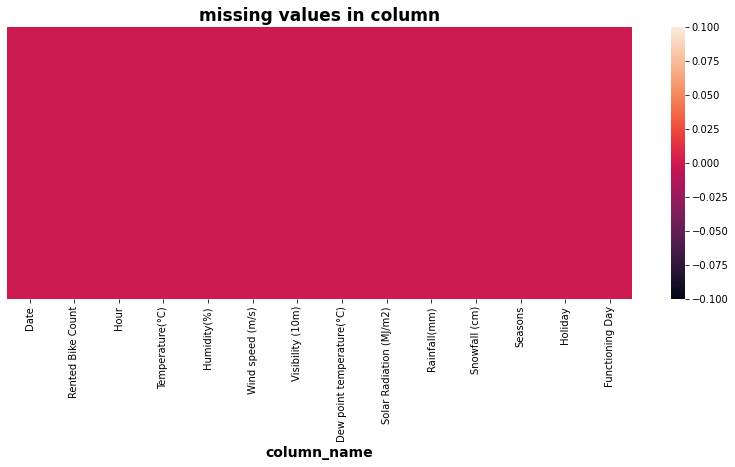

In [12]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [13]:
# Transpose index and columns
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [14]:
numerical_features = data.describe().columns
dist_column = list(numerical_features)
dist_column

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

# <b> Exploratory Data Analysis and Preprocessing (EDA)

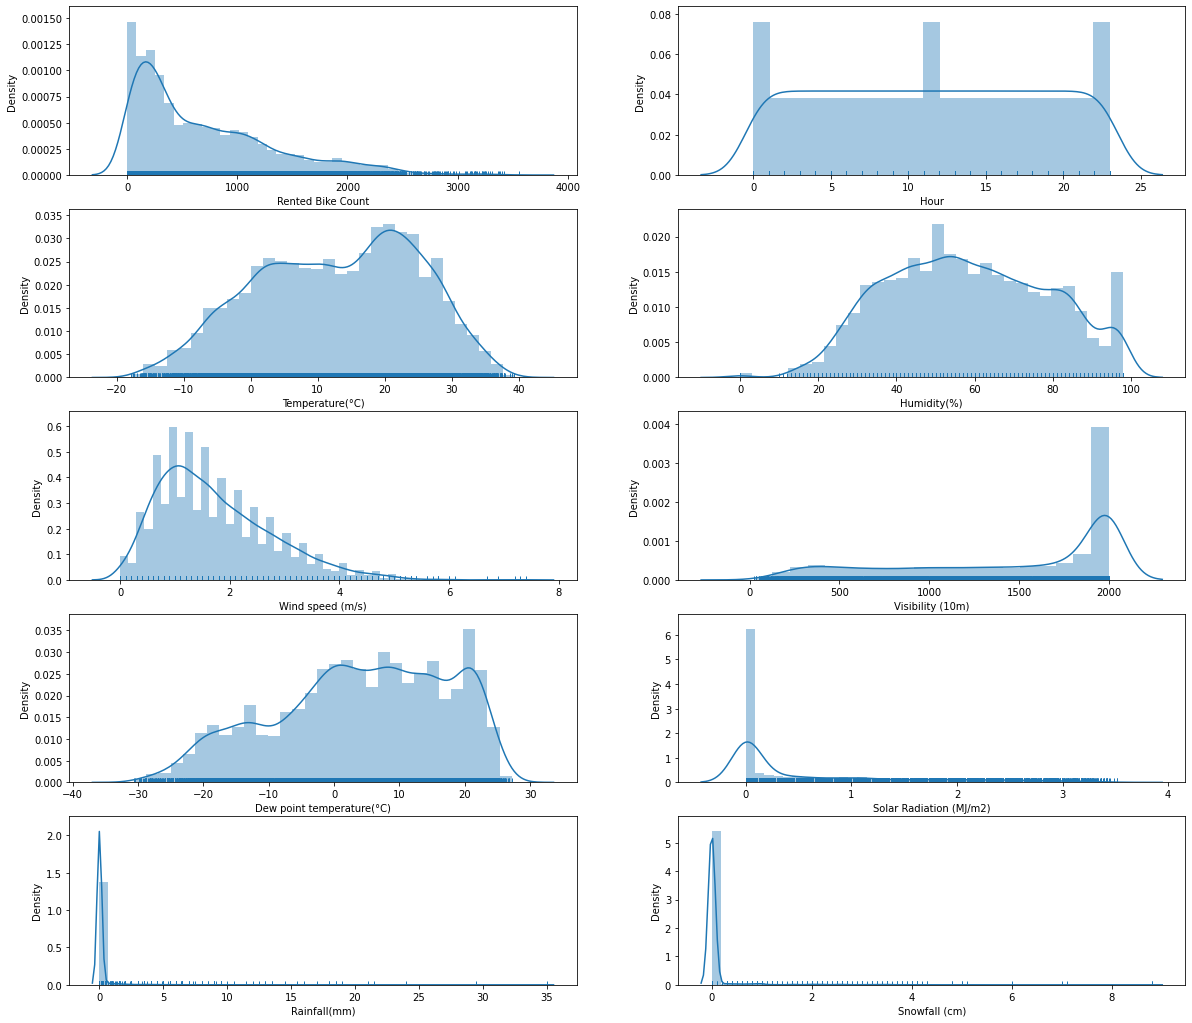

In [15]:
#Distributions of various features in the dataset
plt.figure(figsize=(20,18))
for i in range(len(dist_column)):
  plt.subplot(5,2,i+1)
  sns.distplot(data[dist_column[i]],hist=True,rug=True)

# <b> Plotting Histogram

In [16]:
# Numerical features

numeric_features= data.select_dtypes(exclude='object')

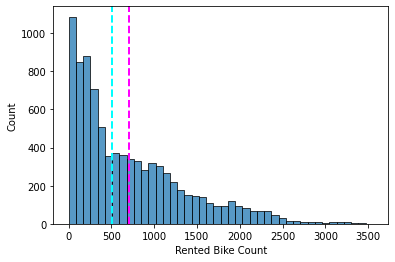

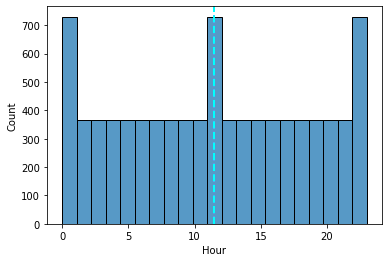

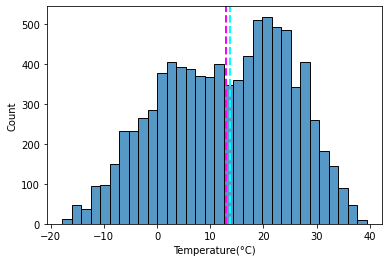

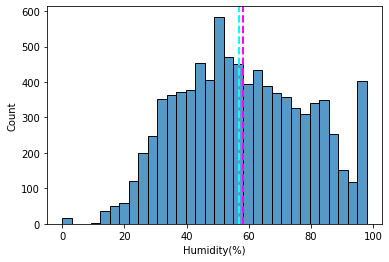

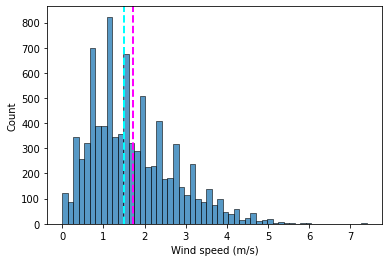

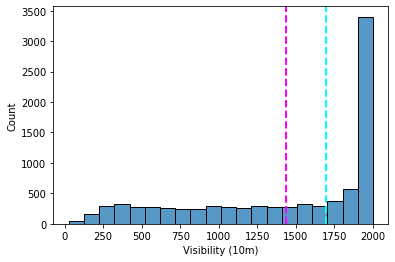

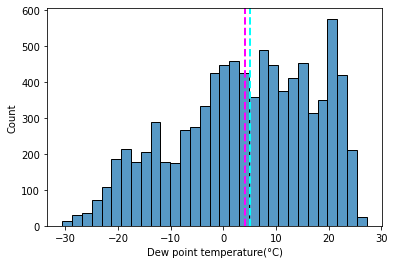

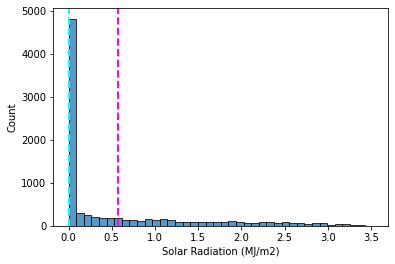

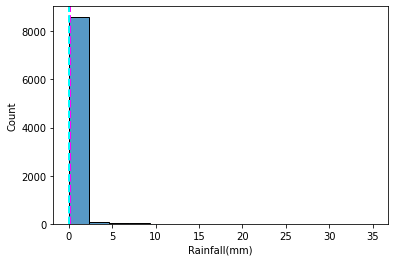

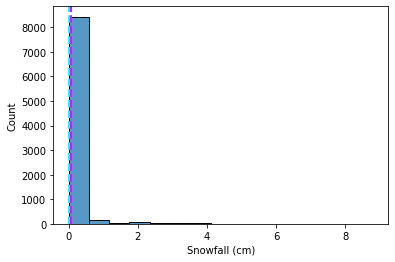

In [17]:
for col in numeric_features[:]:
  sns.histplot(data[col])
  plt.axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

In [18]:
# Extraction of month and year
frame = pd.to_datetime(data['Date'],dayfirst=True)
data['month'] = frame.dt.month
data['year'] = frame.dt.year

# <b>Number of bikes rented at different months

Text(0.5, 1.0, 'Number of bikes rented at different months')

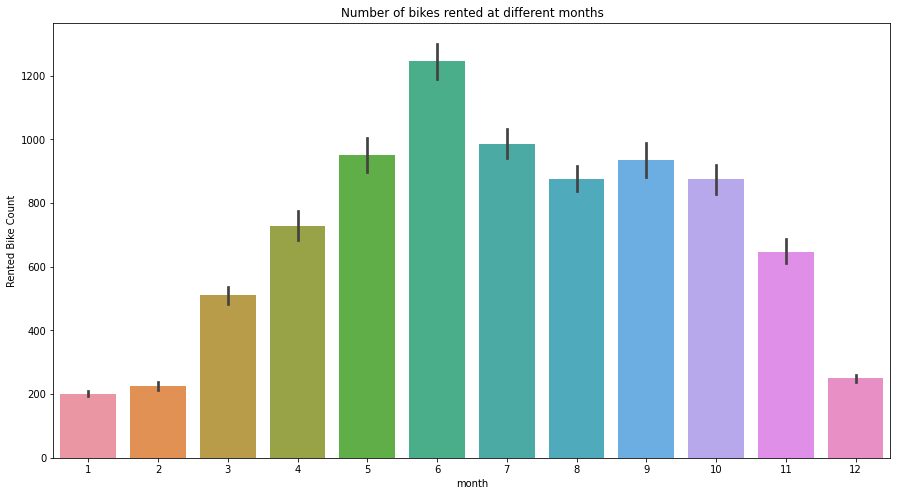

In [19]:
#Plotting number of Bikes rented at different months
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='Rented Bike Count', data = data)
plt.title('Number of bikes rented at different months')

# <b> Number of Bikes rented across different seasons

<Figure size 1080x720 with 0 Axes>

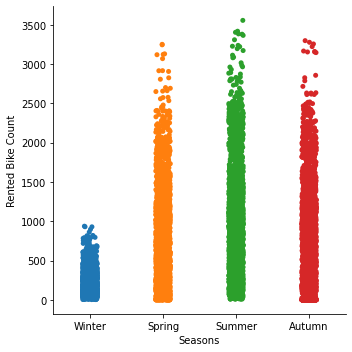

In [20]:
#Number of bikes rented across different seasons
plt.figure(figsize=(15,10))
sns.catplot(x='Seasons',y='Rented Bike Count', data=data)

# <b>Bike counts on funtional and non funtional day

<Figure size 720x360 with 0 Axes>

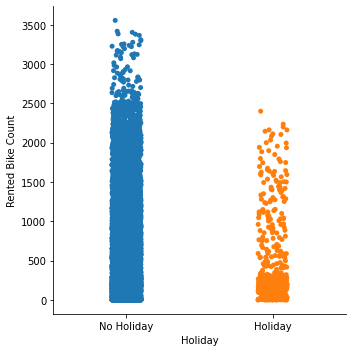

In [21]:
#Bike rent counts on Functioning day and non funtioning day
plt.figure(figsize=(10,5))
sns.catplot(x='Holiday',y='Rented Bike Count', data=data)

# <b> Bike counts across different hours in a day

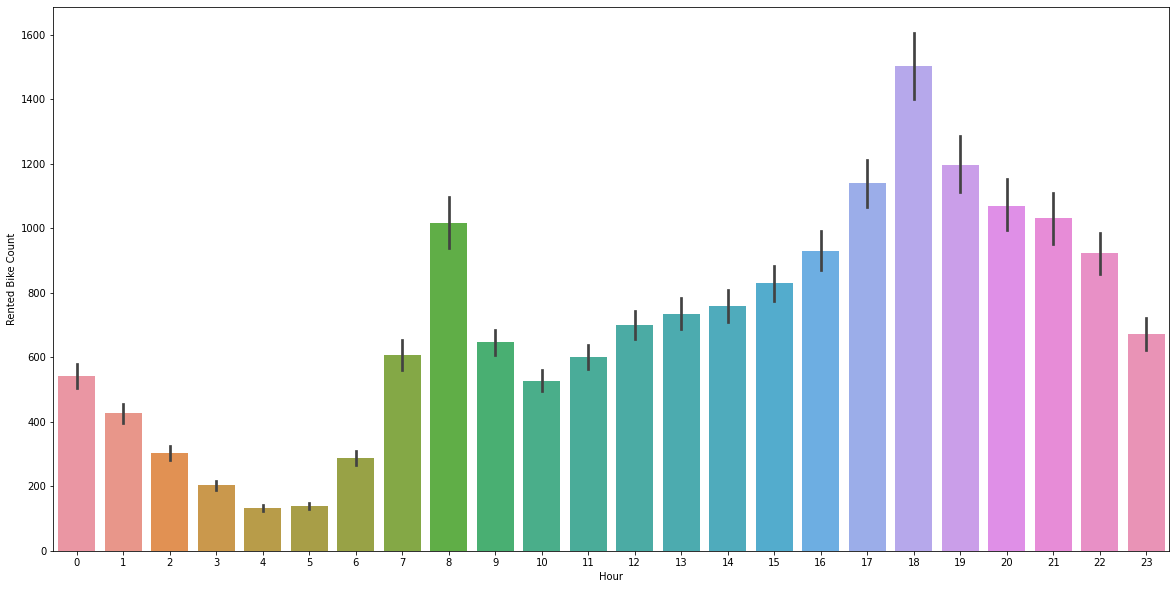

In [22]:
#Bike rent counts across different hours in a day
plt.figure(figsize=(20,10))
sns.barplot(x='Hour',y='Rented Bike Count', data=data)

# <b>Temperature impact on bike renting

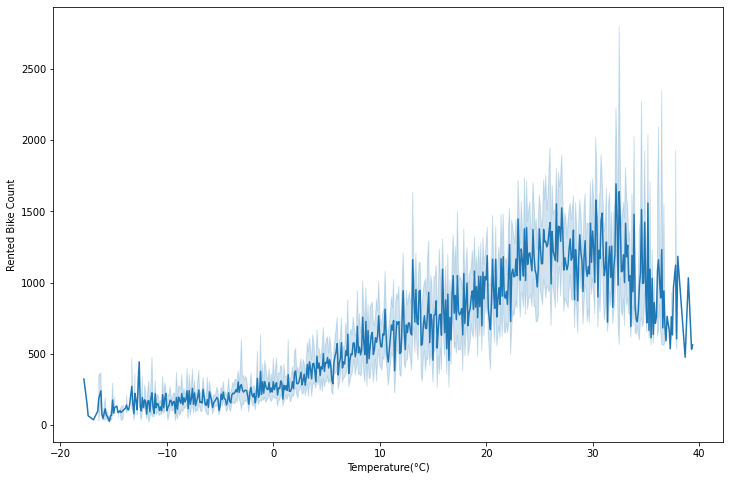

In [23]:
#Looking wether temparature impacts rent count
plt.figure(figsize=(12,8))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count', data=data)

# <b>Dew point temperature impact on bike renting

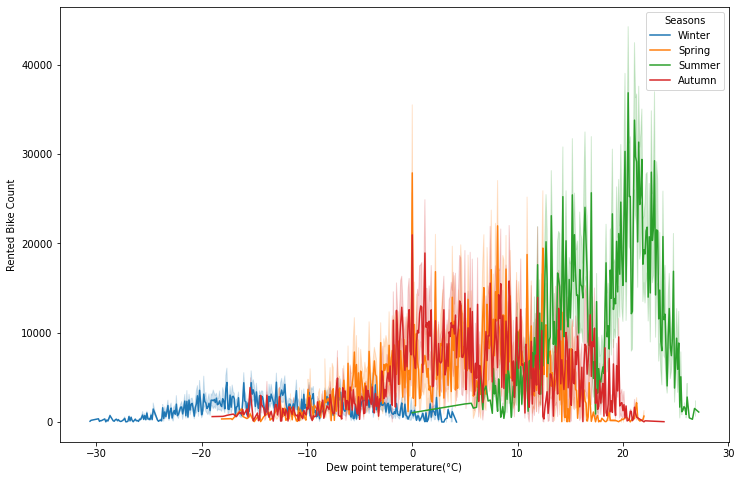

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Dew point temperature(°C)',y='Rented Bike Count', data=data, estimator = 'sum',hue='Seasons',)

#<b> Checking Outliers

# <b> Relation of dependent variable with categorical feat

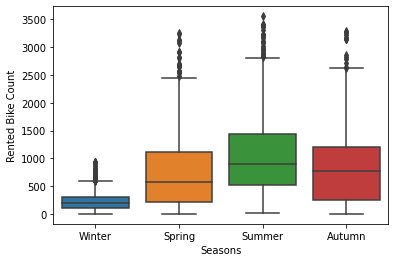

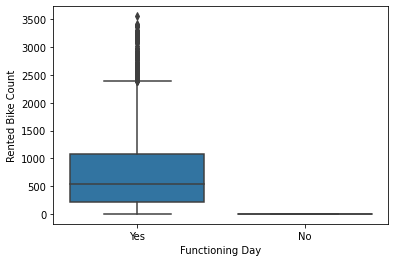

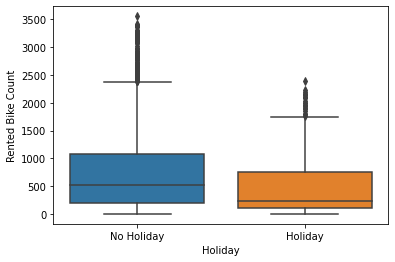

In [25]:
for col in ['Seasons','Functioning Day','Holiday']:
  sns.boxplot(x = data[col],y = data['Rented Bike Count'])
  plt.show()

# <b> Checking Outlayers

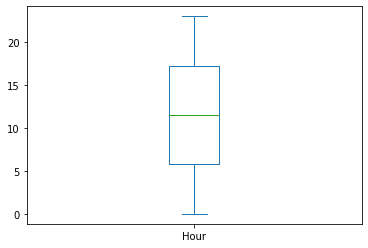

In [26]:
#Outlayers for Hour
data['Hour'].plot.box()

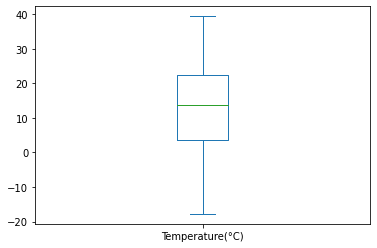

In [27]:
##Outlayers for temperature
data['Temperature(°C)'].plot.box()

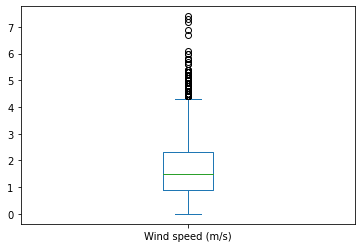

In [28]:
#Outlayers for Wind Speed
data['Wind speed (m/s)'].plot.box()

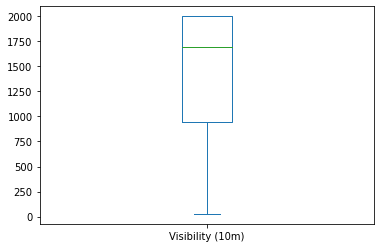

In [29]:
#Outlayers for Visibility
data['Visibility (10m)'].plot.box()

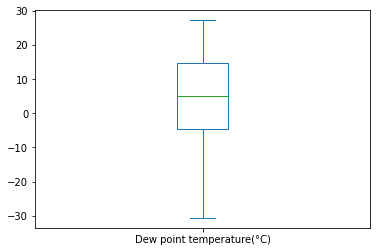

In [30]:
#Outlayers for dew point temperature
data['Dew point temperature(°C)'].plot.box()

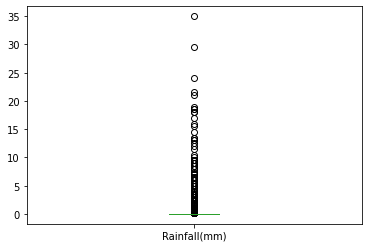

In [31]:
#Outlayers for Rainfall
data['Rainfall(mm)'].plot.box()

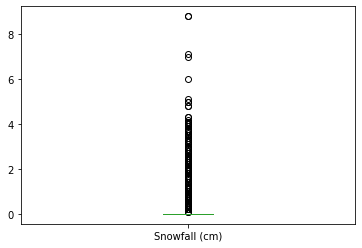

In [32]:
#Outlayers for Snowfall
data['Snowfall (cm)'].plot.box()

###<b>As we have seen there is a high rate of skewness present in the distribution of Snowfall and Rainfall, we would scale the data using log transformation

In [33]:
#Outlier treatment
data['Rainfall(mm)']=np.log10(data['Rainfall(mm)']+1)
data['Snowfall (cm)']=np.log10(data['Snowfall (cm)']+1)

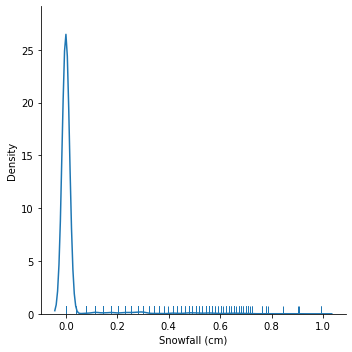

In [34]:
sns.displot(data['Snowfall (cm)'], kind='kde', rug=True)

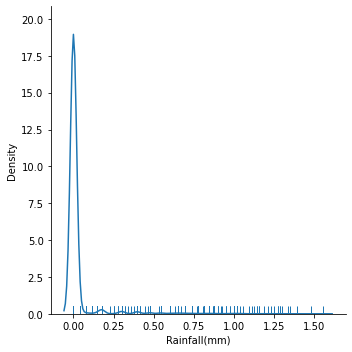

In [35]:
sns.displot(data['Rainfall(mm)'], kind='kde', rug=True)

In [36]:
data['Rainfall(mm)'].fillna(0,inplace = True)
data['Snowfall (cm)'].fillna(0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [37]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [38]:
data.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [39]:
data.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [40]:
data['Functioning Day'].unique()


array(['Yes', 'No'], dtype=object)

In [41]:
new_data = data.drop(['Rented Bike Count', 'Date'], axis =1)

# <b> Correlation Heatmap of Features

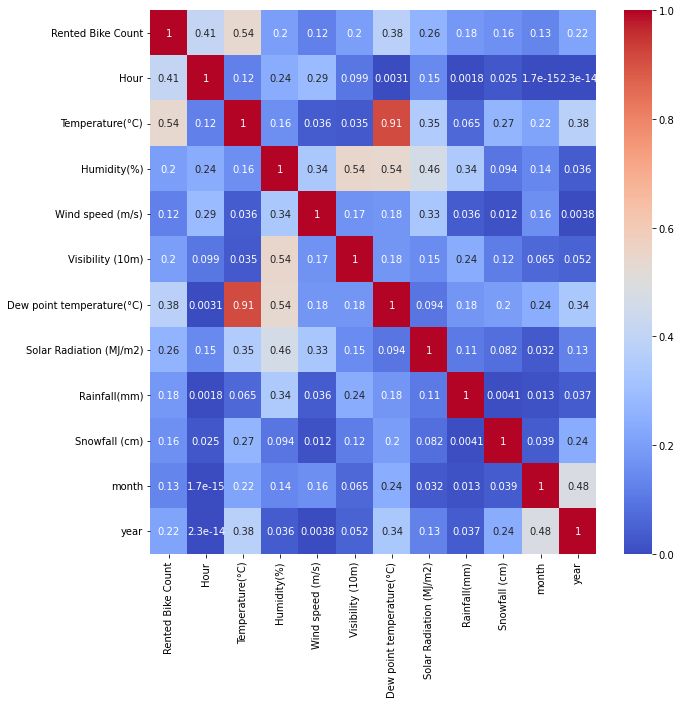

In [78]:
plt.figure(figsize = (10,10))
corr_df = data.corr()
sns.heatmap(abs(data.corr()), cmap='coolwarm', annot=True)

#<b> Modelling

In [43]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [44]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [45]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,4.457234
1,Temperature(°C),3.706426
2,Humidity(%),24.422130
3,Wind speed (m/s),4.890088
4,Visibility (10m),10.466355
5,Solar Radiation (MJ/m2),2.757336
6,Rainfall(mm),1.204028
7,Snowfall (cm),1.176214
8,month,5.107370
9,year,55.331762


In [46]:
new_data.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [47]:
new_data.head(2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [48]:
new_data=pd.get_dummies(data,drop_first=True,sparse=True)

In [49]:
new_data.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1


#<b>We saw that our dependent variable is right skewed, it needs to be normalized.
We do some experiments to normalize it

Text(0.5, 1.0, 'Square root')

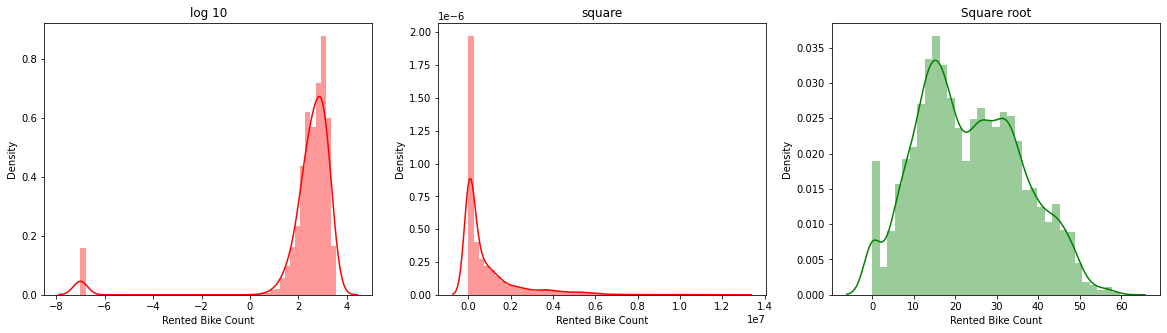

In [50]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(new_data['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((new_data['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(new_data['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

# <b> Geeting Feel of my X_train, X_test, y_train, y_test

In [51]:
X = new_data.drop(columns='Rented Bike Count')
y = np.sqrt(new_data['Rented Bike Count'])

In [52]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [53]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,...,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
2223,15,16.0,14,2.2,1828,-11.5,2.33,0.0,0.0,3,...,0,0,0,0,0,1,0,0,1,1
798,6,-6.7,48,2.4,1991,-15.9,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,1,1,1
7752,0,11.3,71,1.2,1997,6.2,0.00,0.0,0.0,10,...,0,0,0,0,0,0,0,0,1,1
734,14,3.0,28,3.8,1956,-13.7,1.10,0.0,0.0,12,...,0,0,0,0,1,0,0,1,0,1
2881,1,11.5,77,2.0,593,7.6,0.00,0.0,0.0,3,...,0,0,0,0,0,1,0,0,1,1


In [54]:
X_test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,...,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
6056,8,27.2,69,1.8,1999,21.0,0.70,0.0,0.0,8,...,0,0,0,0,0,0,1,0,1,1
5556,12,32.6,51,2.1,800,21.1,3.21,0.0,0.0,7,...,0,0,0,0,0,0,1,0,1,1
5990,14,34.0,50,1.2,1744,22.1,1.68,0.0,0.0,8,...,0,0,0,0,0,0,1,0,1,1
7674,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,10,...,0,0,0,0,0,0,0,0,1,1
3319,7,6.4,51,1.0,1398,-3.0,0.19,0.0,0.0,4,...,0,0,0,0,0,1,0,0,1,1


In [55]:
y_train.head()

2223    35.185224
798     11.704700
7752    29.849623
734     16.186414
2881    22.405357
Name: Rented Bike Count, dtype: float64

In [56]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 380), (2190, 380), (6570,), (2190,))

## <b>Defining a function to train and evaluate the model with Diffrent parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importance

In [58]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  print('\n')

  try:
      # finding the best parameters of the model if any 
    print('*'*20, 'Best Parameters & Best Score', '*'*20)
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    print('None')
    
    

  #predicting the Test set and evaluting the models 
  print('\n')
  print('*'*20, 'Evalution Matrix', '*'*20)

  if model == Linear or model == L1 or model == L2:
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    #Top 10 feature importance graph
    try:
      best = model.best_estimator_
      features = new_X.columns
      importances = best.feature_importances_[0:10]
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='pink',edgecolor='red' ,align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  if model == Linear:
    print("*"*25, "coefficient", "*"*25)
    print(model.coef_)
    print('\n')
    print("*"*25, "Intercept", "*"*25)
    print('\n')
    print(model.intercept_)
  else:
    pass
  print('\n')
  
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

#<b> Linear Regression

In [59]:
# imporing linear models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
Linear = LinearRegression()

Training score  = 0.7728891341910599


******************** Best Parameters & Best Score ********************
None


******************** Evalution Matrix ********************
MAE : 241.25763283432843
MSE : 130208.45486927577
RMSE : 360.8440866486186
R2 : 0.6817982844200695
Adjusted R2 :  0.6149565752324666 

************************* coefficient *************************
[ 4.61429272e-01  7.12586390e-01 -1.42248217e-01  3.17409926e-01
  2.38093824e-03  2.20650892e-01 -1.87076020e+00 -1.35200221e+01
  7.28603830e+00  4.14100543e+09  3.50410767e+07  6.71544532e+09
  2.35358063e+08  6.95080338e+09 -8.04665280e+09 -5.92303413e+09
 -1.00640396e+10 -1.42050450e+10 -2.04316385e+10 -2.45726440e+10
 -2.87136494e+10 -3.46595679e+10  1.08564508e+10  6.71544532e+09
  1.10918088e+10  6.95080338e+09  2.80979794e+09 -5.92303413e+09
 -1.00640396e+10 -1.42050450e+10 -2.04316385e+10 -2.45726440e+10
 -2.87136494e+10 -3.46595679e+10  1.08564508e+10  6.71544532e+09
  1.10918088e+10  6.95080338e+09  2.8097

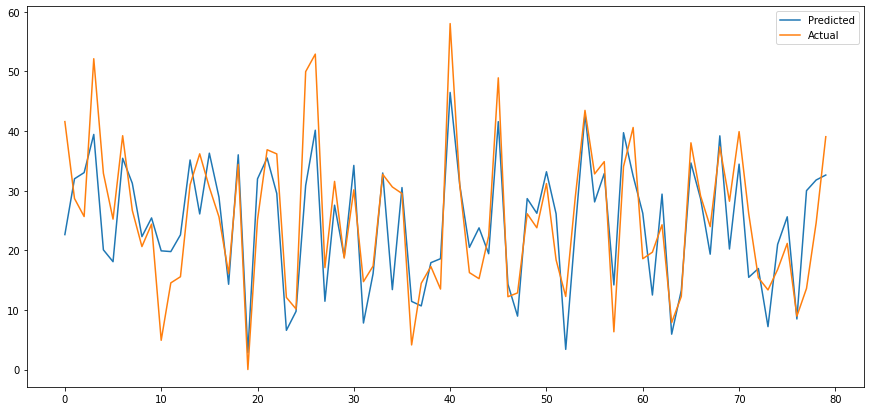

In [60]:
# importing Fitting the linear regression model with our score matrix function 
score_metrix(Linear,X_train,X_test,y_train,y_test)

#<b> Regularization

##<b>Lasso with hyperparameter tuning

In [61]:
# importing Lasso from sklearn
from sklearn.linear_model import Lasso

In [62]:
# Using Grid Search CV for Hyperparameter tuning for Lasso Regression
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
L1 = GridSearchCV(Lasso(), parameters, cv=5) #using gridsearchcv and cross validate the model

Training score  = 0.7728446900455492


******************** Best Parameters & Best Score ********************
The best parameters found out to be :{'alpha': 0.0001} 
where model best score is:  0.74246867549258 



******************** Evalution Matrix ********************
MAE : 241.27439998252228
MSE : 130194.3000413045
RMSE : 360.82447261972754
R2 : 0.6818328758031615
Adjusted R2 :  0.6149984329094089 



******************** ploting the graph of Actual and predicted only with 80 observation ********************


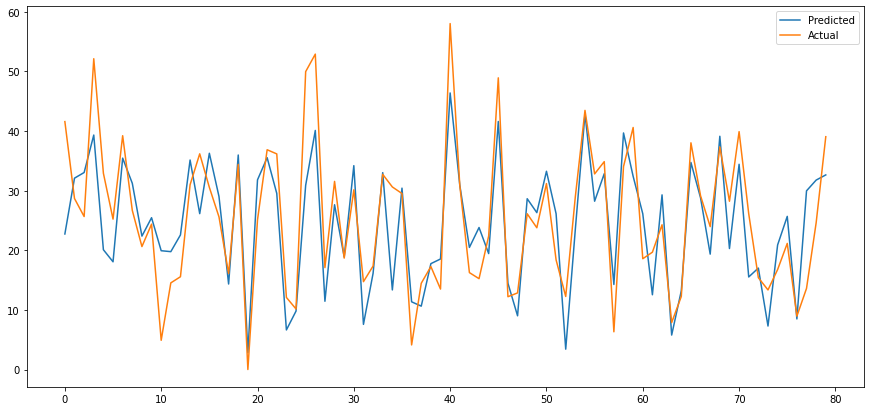

In [63]:
# fit and evaluate model with score_matrix function
score_metrix(L1,X_train,X_test,y_train,y_test)

#<b> Ridge with hyperparameter tuning

In [64]:
# # importing Lasso from sklearn
from sklearn.linear_model import Ridge

In [65]:
# Using Grid Search CV for Hyperparameter tuning for Lasso Regression
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
L2 = GridSearchCV(Ridge(), parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model

Training score  = 0.7715304958449539


******************** Best Parameters & Best Score ********************
The best parameters found out to be :{'alpha': 1} 
where model best score is:  0.7429678607500533 



******************** Evalution Matrix ********************
MAE : 241.65276166381614
MSE : 130822.58006774753
RMSE : 361.69404206835856
R2 : 0.6802974933083804
Adjusted R2 :  0.6131405267286041 



******************** ploting the graph of Actual and predicted only with 80 observation ********************


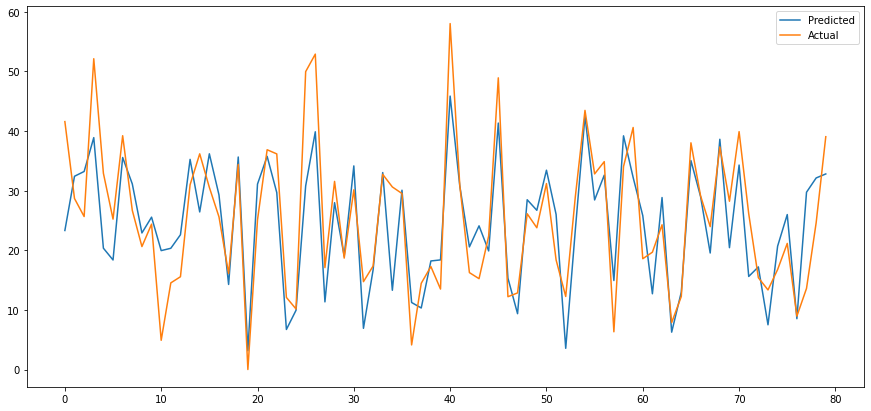

In [66]:
# fit and evaluate model with score_matrix function
score_metrix(L2,X_train,X_test,y_train,y_test)

#<b> Regression Evaluation Metrics

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(X_train,y_train)

In [68]:
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [69]:
regression.score(X_train,y_train)

0.7728891341910599

In [70]:
reg_pred = regression.predict(X_test)

In [71]:
 regression.coef_

array([ 4.61429272e-01,  7.12586390e-01, -1.42248217e-01,  3.17409926e-01,
        2.38093824e-03,  2.20650892e-01, -1.87076020e+00, -1.35200221e+01,
        7.28603830e+00,  4.14100543e+09,  3.50410767e+07,  6.71544532e+09,
        2.35358063e+08,  6.95080338e+09, -8.04665280e+09, -5.92303413e+09,
       -1.00640396e+10, -1.42050450e+10, -2.04316385e+10, -2.45726440e+10,
       -2.87136494e+10, -3.46595679e+10,  1.08564508e+10,  6.71544532e+09,
        1.10918088e+10,  6.95080338e+09,  2.80979794e+09, -5.92303413e+09,
       -1.00640396e+10, -1.42050450e+10, -2.04316385e+10, -2.45726440e+10,
       -2.87136494e+10, -3.46595679e+10,  1.08564508e+10,  6.71544532e+09,
        1.10918088e+10,  6.95080338e+09,  2.80979795e+09, -5.92303413e+09,
       -1.00640396e+10, -1.42050450e+10, -2.04316385e+10, -3.54290947e+10,
       -2.87136494e+10, -3.46595679e+10,  1.08564508e+10,  6.71544532e+09,
        1.10918088e+10,  6.95080338e+09,  2.80979795e+09, -5.92303413e+09,
       -1.00640396e+10, -

In [72]:
y_pred_train = reg.predict(X_train)

In [73]:
y_pred = reg.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)
MAE = mean_absolute_error(y_test,y_pred)
print('MAE:', MAE)
RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

MSE: 41.7214459119055
MAE: 4.9524183026593995
RMSE: 6.459214032055719


In [75]:
r2_line_train = r2_score(y_train,y_pred_train)*100
r2_line_train

77.28891341910598

In [76]:
r2 = r2_score(y_test,y_pred)*100
print("R2:", r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

R2: 72.43298615650676
Adjusted R2 :  0.6664223697987468


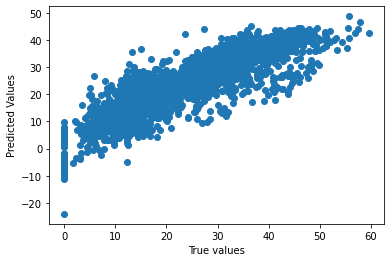

In [77]:
#Analysing true and Predicted Value
plt.scatter(y_test,y_pred)
plt.xlabel('True values'), plt.ylabel('Predicted Values')
plt.show()

#<b> Random Forest Regression

In [80]:
rand = RandomForestRegressor(n_estimators=100, random_state = 0)
rand.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [81]:
#predicting on training dataset
y_reg_pred = rand.predict(X_train)

In [82]:
#predicting on test dataset
y_reg_pred_test = rand.predict(X_test)


In [83]:
MSE_rand = mean_squared_error(y_test, y_reg_pred_test)
print('MSE :', MSE_rand)
MAE_rand = mean_absolute_error(y_test, y_reg_pred_test)
print('MAE:', MAE_rand)
RMSE_rand = np.sqrt(MSE_rand)
print('RMSE:', RMSE_rand)

MSE : 13.358618872601816
MAE: 2.4026321022966943
RMSE: 3.6549444417941315


In [84]:
#R2 score
r2_rand_train = r2_score(y_train,y_reg_pred)*100
r2_rand_train

98.78853127155128

In [85]:
r2_rand_test = r2_score(y_test,y_reg_pred_test)*100
r2_rand_test

91.17343075384932

In [86]:
#Adjusted R2 Score
print('Adjusted R2 Score :', 1 - (1-r2_score(y_test, y_reg_pred_test))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Adjusted R2 Score : 0.8931931449429307


<function matplotlib.pyplot.show>

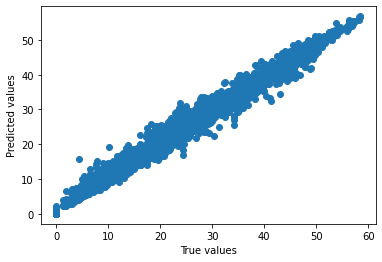

In [87]:
#Analyzing true and predicted values
plt.scatter(y_train,y_reg_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show

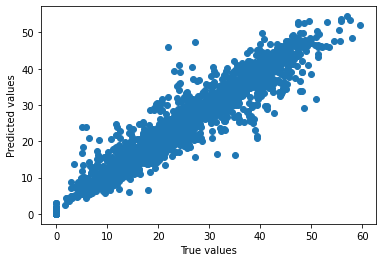

In [88]:
plt.scatter(y_test,y_reg_pred_test)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

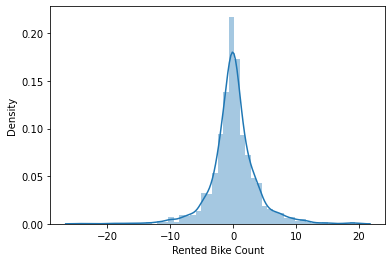

In [89]:
#Residual analysis
e = y_test - y_reg_pred_test
sns.distplot(e)
plt.show()

#<b> Conclusion


1) We have used two regression models in our analysis to predict the rented bike count that are Linear Regression and Random Forest Regression.

2) We have used Hyperparameter tuning on Linear regression using GridSearchCV to find the best parameters.

3) Random Forest Regression is the best model among the three with least errors and highest R2 score.

4) There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

5) The peak time is 6pm where highest number of bookings are rented.

6) Approximateply between 10 degree celsius to 20 degree celsius the rent booking is peak.

7) Number of bookings are very much higher in Summer season.

8) 'Rainfall' and 'Snowfall' has a huge impact on number of bikes rented.

9) Bike renting is high on Funtional days (ie No holiday).

10) The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

11) When the rainfall was less, people have booked more bikes except some few cases.

12) People prefered more rented bikes in the morning than the evening